In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import metrics
np.random.seed(4)

In [3]:
#Read in Data
df = pd.read_csv("doi_10.5061_dryad.8t8s248__v1 (1)/Moffitt_and_Bambah-Mukku_et_al_merfish_all_cells.csv")

In [4]:
#Create Feature set and Target vector
X1 = df.iloc[:,1:3]
X2 = df.iloc[:,4:]
y = df["Behavior"]
X = pd.concat([X1,X2],axis=1)

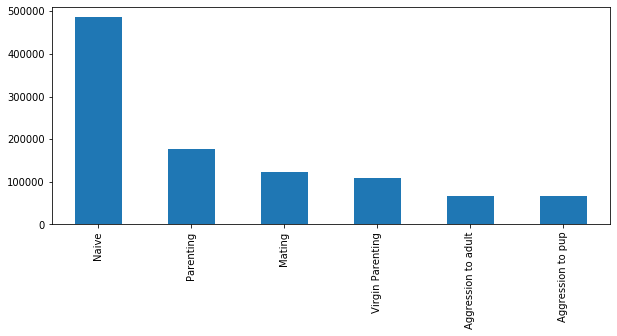

In [5]:
#Plot distribution of values in Target vector
fig, ax = plt.subplots(figsize=(10,4))
y.value_counts().plot(kind="bar")

In [6]:
#Check which columns have NA values
X.isna().sum()[X.isna().sum() > 0]/X.shape[0]

Neuron_cluster_ID    0.544656
Fos                  0.472499
dtype: float64

In [7]:
#Impute NA values with actual values they represent
X.iloc[np.where(X["Neuron_cluster_ID"].isna())[0],6] = "Not a Neuron"
X.iloc[np.where(X["Fos"].isna())[0],151] = 0

In [8]:
#One-hot encode categorical features to preserve their data
X_notonehot = X[X.columns[X.dtypes!="object"]]
X_onehot = X[X.columns[X.dtypes=="object"]]
df_onehot = pd.get_dummies(X_onehot)
X_new = pd.concat([df_onehot,X_notonehot],axis=1)
X_new.shape

(1027848, 254)

In [9]:
#Split the data
Xtrain,Xtest,ytrain,ytest = train_test_split(X_new,y,test_size=0.25)

In [10]:
#Test algorithm over a range of max_depth values
depth_vals = np.linspace(2,20,10)
acc_list = []
for depth in depth_vals:
    rforest3 = RandomForestClassifier(n_estimators=10,max_depth=depth)
    rforest3.fit(Xtrain,ytrain)
    ytestcheck = rforest3.predict(Xtest)
    acc = metrics.accuracy_score(ytest, ytestcheck)
    acc_list.append(acc)
    


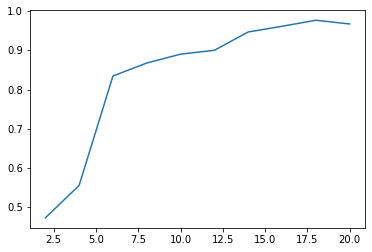

In [11]:
#Plot the accuracy values
fig, ax = plt.subplots()
ax.plot(depth_vals,acc_list)

In [16]:
#Test algorithm over a range of n_estimators values
estimators = np.linspace(10,80,8).astype(int)
acc_list = []
for estimator in estimators:
    rforest3 = RandomForestClassifier(n_estimators=estimator,max_depth=14)
    rforest3.fit(Xtrain,ytrain)
    ytestcheck = rforest3.predict(Xtest)
    acc = metrics.accuracy_score(ytest, ytestcheck)
    acc_list.append(acc)

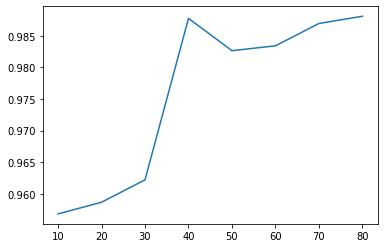

In [17]:
#Plot the accuracies
fig, ax = plt.subplots()
ax.plot(estimators,acc_list)

In [33]:
#Test n_estimators of 40 and max_depth of 18
rforest4 = RandomForestClassifier(n_estimators=40,max_depth=18)
rforest4.fit(Xtrain,ytrain)
ytestcheck = rforest4.predict(Xtest)
metrics.accuracy_score(ytest,ytestcheck)

0.9937033491333349

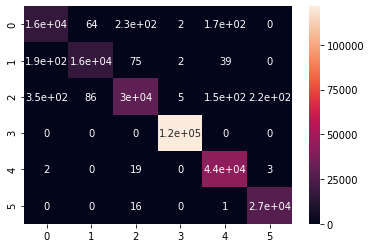

In [34]:
#Confusion matrix of test results
cm = confusion_matrix(ytest,ytestcheck)
sns.heatmap(cm,annot=True)

In [36]:
#F1 Score. Value in paper was averaged to be 0.985
f1 = metrics.f1_score(ytest,ytestcheck,average='macro')
f1

0.9881600448803117